In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from operator import add

In [4]:
def LectureInstance(nomFichier):
    f = open(nomFichier, "r")
    w = []
    v1 = []
    v2 = []
    for line in f:
        if line[0] == 'n':
            n = int(line[1:])
            
        if line[0] == 'i':
            line_splited = line.split()
            w.append(int(line_splited[1]))
            v1.append(int(line_splited[2]))
            v2.append(int(line_splited[3]))
            
        if line[0] == 'W':
            W = int(line[1:])
            
    return (n, W, w, v1, v2)
            
            
n, W, w, v1, v2 = LectureInstance("InstancesMOKP/100_items/2KP100-TA-0.dat")
print(n,W,w)

100 26856 [394, 911, 768, 477, 513, 636, 607, 138, 401, 998, 839, 637, 972, 527, 891, 807, 949, 193, 349, 458, 970, 267, 760, 532, 931, 285, 354, 440, 331, 351, 589, 440, 814, 483, 920, 641, 281, 447, 276, 170, 126, 984, 383, 294, 245, 126, 745, 53, 240, 656, 759, 520, 205, 573, 158, 890, 55, 5, 181, 913, 552, 687, 757, 577, 629, 833, 831, 903, 497, 889, 248, 700, 232, 224, 971, 719, 592, 337, 4, 833, 483, 712, 41, 674, 185, 730, 203, 653, 88, 686, 362, 666, 289, 984, 332, 958, 699, 384, 916, 793]


In [5]:
def LecturePtsNonDom(nomFichier):
    f = open(nomFichier, "r")
    NonDom = []
    for line in f:
        line_splited = line.split()
        NonDom.append((int(line_splited[0]), int(line_splited[1])))           
    return NonDom
                   
NonDom = LecturePtsNonDom("InstancesMOKP/100_items/2KP100-TA-0.eff")

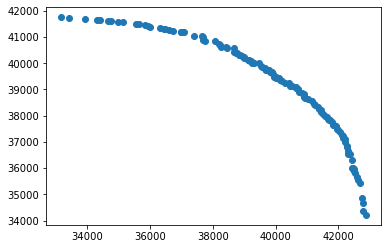

In [6]:
def DrawNonDom(NonDom):
    plt.scatter(*zip(*NonDom))
    plt.show()
    
DrawNonDom(NonDom)

In [7]:
def PYN(YnHat, NonDom):
    """YnHat une approximation et NonDom la réalité"""
    return len(set(YnHat)&set(NonDom))/len(NonDom)

def pk(NonDom):
    """Renvoie les poids p1 et p2"""
    # ON EST EN MAXIMISATION !!!!
    y1ptIdeal = max([NonDom[i][0] for i in range(len(NonDom))])
    y2ptIdeal = max([NonDom[i][1] for i in range(len(NonDom))])
    y1ptNadir = min([NonDom[i][0] for i in range(len(NonDom))])
    y2ptNadir = min([NonDom[i][1] for i in range(len(NonDom))])
    
    return (1/(y1ptIdeal-y1ptNadir), 1/(y2ptIdeal-y2ptNadir))

def d(pt1, pt2, NonDom):
    """Renvoie la distance euclidienne pondérée entre les points pt1 et pt2"""
    p1, p2 = pk(NonDom)
    res = p1*(pt1[0]-pt2[0])**2 + p2*(pt1[1]-pt2[1])**2
    return math.sqrt(res)

def dPrime(YnHat, pt1, NonDom):
    """Renvoie dPrime de YnHat et pt1"""
    return min(d(pt2,pt1,NonDom) for pt2 in YnHat)

def DM(YnHat, NonDom):
    """YnHat une approximation et NonDom la réalité"""
    return sum(dPrime(YnHat, pt1, NonDom) for pt1 in NonDom)/len(NonDom)
 
    
print(DM([(0,0),(10,20)],NonDom))

605.1764642536623


In [8]:
def popInitiale(W,w):
    Wtemp = W
    n = len(w)
    Lsol = [0 for i in range(n)]
    tupled = list(zip( w,range(n)))
    sortedByValue = sorted(tupled, key=lambda tup: tup[0])
    possibleObject = [(x,y) for x,y in sortedByValue if x<=W]
    while len(possibleObject)>0:
        r=random.randint(0,len(possibleObject)-1)
        Lsol[possibleObject[r][1]]=1
        Wtemp-=possibleObject[r][0]
        possibleObject.pop(r)
        possibleObject=[(x,y) for x,y in possibleObject if x<=Wtemp]
    return [Lsol]
    
    
def somme(N,w):
    somme=0
    for k in range(len(N)):
        if(N[k]==1):
            somme+=w[k]
    return somme

def f(x):
    return (sum(v1[i]*x[i] for i in range(len(x))),sum(v2[i]*x[i] for i in range(len(x))))

def non_domine(a, b):
    f_a=f(a)
    f_b=f(b)
#     print("domine",f_a,f_b,((f_a[0]< f_b[0] and f_a[1]<=f_b[1]) or (f_a[0]<= f_b[0] and f_a[1]<f_b[1])))
    return not ((f_a[0]< f_b[0] and f_a[1]<=f_b[1]) or (f_a[0]<= f_b[0] and f_a[1]<f_b[1]))

def domine(a, b):
    f_a=f(a)
    f_b=f(b)
    return (f_a[0]>= f_b[0] and f_a[1]>=f_b[1]) 


def MiseAJour(X, x):
    """Mise à jour de la liste X en cherchant à ajouter potentiellement x
    Cette procédure renverra un booléan égal à Vrai si la solution a été ajoutée dans la liste"""
    l = []
    for sol in X:
        if domine(sol,x):
            return False
        elif domine(x,sol):
            l.append(sol) 
            
    for y in l:
        X.remove(y)
        
    X.append(x)
    return True

def Voisin(x, W, w): 
    n = len(x)
    N = []
    Wrestant = W - sum(w[i]*x[i] for i in range(len(x))) 
    for i in range(n):
        if(x[i]==1):
            Wpossible = Wrestant+w[i]
            res = x.copy()
            listOfPossible = [i for i in range(n) if w[i]<= Wpossible and res[i]==0]
            res[i] = 0
            for j in listOfPossible:
                res2 = res.copy()
                res2[j] = 1
                Wpossible2 = Wpossible-w[j]
                listOfPossible2 = [i for i in range(n) if w[i]<= Wpossible2 and res2[i]==0]
                while listOfPossible2 !=[]:
                    randomi = listOfPossible2[random.randint(0,len(listOfPossible2)-1)]
                    res2[randomi] = 1
                    Wpossible2 = Wpossible2-w[randomi]
                    listOfPossible2 = [i for i in range(n) if w[i]<= Wpossible2 and res2[i]==0]
                N.append(res2)
    return N

def PLS(W,w , verbose=True):
    start = time.time()
    P0 = popInitiale(W, w)
    Xe = P0.copy()
    P = P0.copy()
    Pa = []
    while P != []:
        for p in P:
            voisins = Voisin(p, W, w)
            for pPrime in voisins:
                if non_domine(pPrime, p):
                    if MiseAJour(Xe, pPrime):
                        MiseAJour(Pa, pPrime)

        P = Pa.copy()
        Pa = []
        if verbose:
            print("Taille P:{}, time total: {:.2f} s".format(len(P), time.time()-start))
    return Xe

Taille P:6, time total: 0.12 s
Taille P:15, time total: 0.64 s
Taille P:14, time total: 2.16 s
Taille P:21, time total: 3.79 s
Taille P:28, time total: 6.24 s
Taille P:34, time total: 9.12 s
Taille P:33, time total: 17.55 s
Taille P:41, time total: 24.43 s
Taille P:35, time total: 34.75 s
Taille P:35, time total: 42.77 s
Taille P:39, time total: 48.38 s
Taille P:48, time total: 54.27 s
Taille P:48, time total: 61.33 s
Taille P:50, time total: 64.84 s
Taille P:39, time total: 69.27 s
Taille P:34, time total: 72.88 s
Taille P:18, time total: 75.89 s
Taille P:7, time total: 77.37 s
Taille P:0, time total: 77.99 s


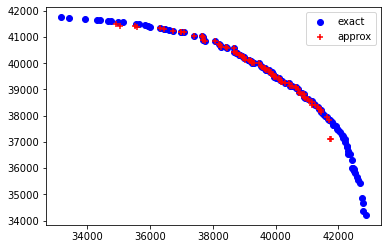

Proportion 51.2 %
Distance moyenne 3.6410681388571007


In [9]:
Xe = PLS(W, w)

ListS = [f(k) for k in Xe]
plt.scatter(*zip(*NonDom),c = 'blue',label='exact')
plt.scatter(*zip(*ListS),marker = '+',c = 'red',label='approx')
plt.legend()
plt.show()

print("Proportion", PYN(ListS, NonDom)*100,"%")
print("Distance moyenne", DM(ListS, NonDom))

In [10]:
def popInitialeV2( W, w, S):
    Wtemp = W
    n = len(w)
    Lsol = [0 for i in range(n)]
    tupled = list(zip(w, range(n), Lsol))
    sortedByValue = sorted(tupled, key=lambda tup: tup[0])
    possibleObject = [(x,y,z) for x,y,z in sortedByValue if x<=W]
    for _ in range((S)):
        q = random.uniform(0, 1)
        R_i = [(q*v1[i]+(1-q)*v2[i])/w[i] for i in range(n)]
        for k in  range(len(possibleObject)):
            possibleObject[k]=(possibleObject[k][0],possibleObject[k][1],R_i[possibleObject[k][1]])
        r = max(possibleObject,key=lambda item:item[2])
        Lsol[r[1]] = 1
        Wtemp-= r[0]
        possibleObject.remove(r)
        possibleObject = [(x,y,z) for x,y,z in possibleObject if x<=Wtemp]
        if possibleObject==[]:
            break
    return [Lsol]

def PLSV3(W, w, S , verbose=True):
    start = time.time()
    P0 = popInitialeV2(W, w, S)
    Xe = P0.copy()
    P = P0.copy()
    Pa = []
    while P != []:
        for p in P:
            voisins = Voisin(p,W,w)
            for pPrime in voisins:
                if non_domine(pPrime, p):
                    if MiseAJour(Xe, pPrime):
                        MiseAJour(Pa, pPrime)

        P=Pa.copy()
        Pa = []
        if verbose:
            print("Taille P:{}, temps total: {:.2f} s".format(len(P), time.time()-start))
    return Xe

Taille P:15, temps total: 0.61 s
Taille P:40, temps total: 2.36 s
Taille P:46, temps total: 6.04 s
Taille P:29, temps total: 9.17 s
Taille P:17, temps total: 11.30 s
Taille P:9, temps total: 12.67 s
Taille P:7, temps total: 13.39 s
Taille P:12, temps total: 14.48 s
Taille P:13, temps total: 16.63 s
Taille P:8, temps total: 18.41 s
Taille P:4, temps total: 21.17 s
Taille P:3, temps total: 23.26 s
Taille P:0, temps total: 24.70 s


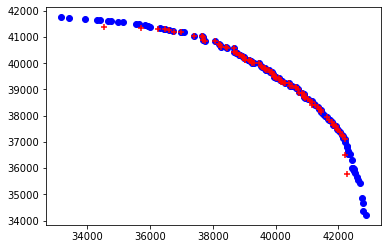

Proportion 59.199999999999996 %
Distance moyenne 1.4848665486950052


In [11]:
Xe = PLSV3(W, w, S=60)

ListS = [f(k) for k in Xe]
plt.scatter(*zip(*NonDom),c = 'blue', label='exact')
plt.scatter(*zip(*ListS),marker = '+',c = 'red', label='approx')
plt.show()

print("Proportion", PYN(ListS, NonDom)*100, "%")
print("Distance moyenne", DM(ListS, NonDom))

Taille P:6, temps total: 0.43 s
Taille P:13, temps total: 1.08 s
Taille P:24, temps total: 2.85 s
Taille P:31, temps total: 6.12 s
Taille P:33, temps total: 10.78 s
Taille P:46, temps total: 16.76 s
Taille P:47, temps total: 26.99 s
Taille P:43, temps total: 35.82 s
Taille P:58, temps total: 46.19 s
Taille P:56, temps total: 64.75 s
Taille P:57, temps total: 82.21 s
Taille P:64, temps total: 96.02 s
Taille P:57, temps total: 119.64 s
Taille P:47, temps total: 132.08 s
Taille P:36, temps total: 141.57 s
Taille P:14, temps total: 149.49 s
Taille P:4, temps total: 151.99 s
Taille P:0, temps total: 152.59 s


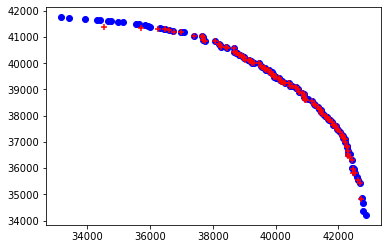

Proportion 69.6 %
Distance moyenne 0.7657303329935867


In [12]:
Xe = PLSV3(W, w, S=10)

ListS = [f(k) for k in Xe]
plt.scatter(*zip(*NonDom),c = 'blue', label='exact')
plt.scatter(*zip(*ListS),marker = '+',c = 'red', label='approx')
plt.show()

print("Proportion", PYN(ListS, NonDom)*100, "%")
print("Distance moyenne", DM(ListS, NonDom))

1
Taille P:1, temps total: 0.01 s
1
Taille P:1, temps total: 0.03 s
54
Taille P:0, temps total: 4.28 s


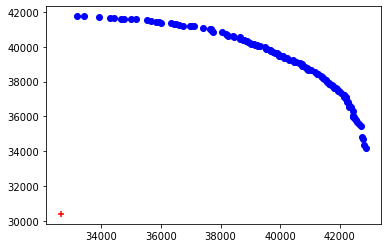

In [13]:
def VoisinV2(x, W, w, L):
    q = random.uniform(0, 1)
    n = len(w)
    R_i = [(q*v1[i]+(1-q)*v2[i])/w[i] for i in range(n)]
    R_i=list(zip(R_i,range(n)))
    sortedByValue = sorted(R_i, key=lambda tup: tup[0])
    sortedByValueInv = sorted(R_i, key=lambda tup: tup[0],reverse=True)
    l1=[0]*n
    l2=[0]*n
    cpt=0
    cpt2=0
    for k in sortedByValue:
        if x[k[1]]==1:
            cpt+=1
            l1[k[1]]=1
        if cpt==L:
            break
    for k in sortedByValueInv:
        if x[k[1]]==0:
            cpt2+=1
            l2[k[1]]=1
        if cpt2==L:
            break
    l3=list( map(add, l1, l2))
    NewW= W - sum([w[i]*x[i] for i in range(n) if l1[i]==0])
    neww= []

    for i in range(n):
        if l3[i]==1:
            neww.append(w[i])

    res = PLSV3(NewW, neww,S=1, verbose=False)
    
    ListVoisin=[]
    for k in res:
        temp=[0]*n
        cpt=0
        for j in range(n):
            if l3[j]==1:
                temp[j]=k[cpt]
                cpt+=1
        ListVoisin.append(temp)
#     print("l3",ListVoisin[0])    
    print(len(ListVoisin))
    return ListVoisin
    

def PLSV4(W, w, S, L):
    start = time.time()
    P0 = popInitialeV2(W, w, S)
    Xe = P0.copy()
    P = P0.copy()
    Pa = []
    while P != []:
        for p in P:
            voisins = VoisinV2(p, W, w, L)
            for pPrime in voisins:
                if non_domine(pPrime, p):
                    if MiseAJour(Xe, pPrime):
                        MiseAJour(Pa, pPrime)

        P=Pa.copy()
        Pa = []
        print("Taille P:{}, temps total: {:.2f} s".format(len(P), time.time()-start))
    return Xe

Xe = PLSV4(W, w, S=5, L=25)

ListS = [f(k) for k in Xe]
plt.scatter(*zip(*NonDom),c = 'blue')
plt.scatter(*zip(*ListS),marker = '+',c = 'red')
plt.show()